In [2]:
%config InlineBackend.figure_formats = ['svg']

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

sympy.init_printing()

# 第二章 进化是什么

## 繁殖

假设一个细菌细胞生存在营养充足的理想环境中，在此细菌的天堂中，这个幸运的细胞及其所有后代将每 20 min 分裂一次，20 min 后，一个细胞会分化出 2 个子细胞，40 min 后，会分化成 4 个孙细胞；

$t$ 世代后，一个细胞会产生 $2^t$ 个后代，这一无限扩张的增长规律可以通过如下的递归方程来描述：

In [15]:
xt = sympy.Symbol(r"x_t") # xt 变量
xt1 = sympy.Symbol(r"x_{t+1}") # xt+1 变量

In [16]:
eq = sympy.Eq(xt1, 2 * xt)
eq

定义 $0$ 时刻的细胞数量为 $x_0$，在这一初始条件下，方程的解可以写成：

$$
x_t = x_02^t
$$

对度量时间连续的指数生长过程，我们可以建立微分方程来描述，令 $f(t)$ 表示 $t$ 时刻的细胞数，假定细胞分裂速率为 $r$ 更准确地，我们假定细胞分裂的时间服从一个期望为 ${1 \over r}$ 的指数分布，可以写出如下微分方程：

In [19]:
t = sympy.Symbol('t')
f = sympy.Function('f')
r = sympy.Symbol('r')

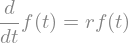

In [20]:
eq = sympy.Eq(sympy.diff(f(t), t), r * f(t))
eq

In [24]:
x0 = sympy.Symbol("x_0")  # 初始状态
solve = sympy.dsolve(eq, ics={f(0): x0})
solve

我们再次考虑上述那颗细菌超级新星，如果我们以天为单位来测度时间，那么 $r=72$ 就表示一个细胞分裂周期平均为 $20$ min （用一天的总分钟数 $1440$ 除以 $72$ 得到），因此，细胞一天分裂 $72$ 次，三天后，一个细菌细胞将分裂成 $e^{216}$ 个细胞，约等于 $6x 10^{93}$ 个细胞。

In [28]:
expr = solve.subs({x0: 1, r: 72})
output = sympy.lambdify(t, expr.rhs, 'numpy')


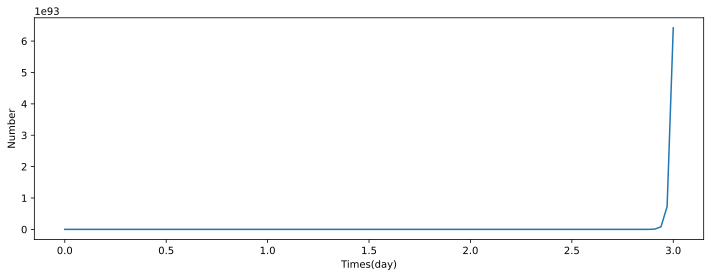

In [41]:
ts = np.linspace(0, 3, 100)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(ts, output(ts), label='number')
ax.set_xlabel("Times(day)")
ax.set_ylabel("Number")
plt.show()

现在我们假设细胞的死亡速率为 d, 这表明它们的寿命服从期望为 1/d 的指数分布，此时，微分方程变成：

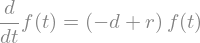

In [42]:
d = sympy.Symbol('d')
eq = sympy.Eq(sympy.diff(f(t), t), (r - d) * f(t))
eq

一个包含环境最大容纳量的种群增长模型由逻辑斯蒂方程(logistic equation) 给出：

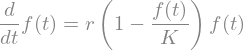

In [43]:
K = sympy.Symbol("K") # 种群容纳量
eq = sympy.Eq(sympy.diff(f(t), t), r * f(t) * (1 - f(t) / K))
eq

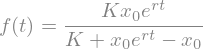

In [46]:
solve = sympy.dsolve(eq, ics={f(0): x0}).simplify()
solve

## 选择

In [48]:
t = sympy.symbols('t')
x, y = sympy.symbols('x, y', cls=sympy.Function)
a, b = sympy.symbols('a, b')

In [49]:
diffx = sympy.Eq(sympy.diff(x(t), t), a * x(t))
diffy = sympy.Eq(sympy.diff(y(t), t), b * y(t))

In [53]:
x0, y0 = sympy.symbols("x_0, y_0")
solx = sympy.dsolve(diffx, ics={x(0): x0})
soly = sympy.dsolve(diffy, ics={y(0): y0})
[solx, soly]

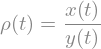

In [55]:
rhot = sympy.Function(r"\rho")(t)
rho_expr = sympy.Eq(rhot, x(t)/y(t))
rho_expr

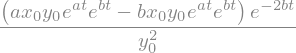

In [65]:
sympy.diff(rho_expr.rhs, t).doit().subs({
    solx.lhs: solx.rhs,
    soly.lhs: soly.rhs,
}).simplify()